<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">66 Days of Data<br>[04/07/2021] Day 2</h1>
<br>

This is slightly modified from the original module in Datacamp, as I find it better to put the concept of covariance later on.

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:black; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

    
* [Dependencies](#1)
* [Configurations](#2)
* [Seeding](#3)
* [Loading Iris Data](#4)
* [Quantitative Exploratory Data Analysis](#5)
    * [Descripte Analytics](#51)
        * [Mean](#511)
        * [Median](#512)
        * [Mode](#513)
        * [Range](#514)
        * [Population Variance](#515)
        * [Population Standard Deviation](#516)
        * [Percentiles](#517)
    * [Box and Whiskers Plot](#52)

<a id="1"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Dependencies</h1>

In [ ]:
# !pip install -U -q scikit-learn==0.24.2

import os
import random
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import torch
import scipy

from tqdm import tqdm
from sklearn.datasets import *

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

<a id="2"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Configurations</h1>

In [ ]:
%matplotlib inline
sns.set(style="ticks")
plt.style.use("dark_background")

# mpl.rc('axes', labelsize=15)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Quantitative Exploratory Data Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
   
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y

    y =  np.arange(start=1, stop=n+1)/n
    
    return x, y

<a id="3"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Seeding</h1>

In [ ]:
def seed_all(seed: int = 1930):
    """Seed all random number generators."""
    print("Using Seed Number {}".format(seed))

    os.environ["PYTHONHASHSEED"] = str(
        seed
    )  # set PYTHONHASHSEED env var at fixed value
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)  # pytorch (both CPU and CUDA)
    np.random.seed(seed)  # for numpy pseudo-random generator
    random.seed(seed)  # set fixed value for python built-in pseudo-random generator
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = False


def seed_worker(_worker_id):
    """Seed a worker with the given ID."""
    worker_seed = torch.initial_seed() % 2 ** 32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
    
seed_all(42)

In [probability](probability_theory "wikilink") and
[statistics](statistics "wikilink"), a **probability mass function** is
a function that gives the probability that a [discrete random
variable](discrete_random_variable "wikilink") is exactly equal to some
value.[^1] Sometimes it is also known as the discrete density function.
The probability mass function is often the primary means of defining a
[discrete probability
distribution](discrete_probability_distribution "wikilink"), and such
functions exist for either [scalar](Scalar_variable "wikilink") or
[multivariate random variables](multivariate_random_variable "wikilink")
whose [domain](Domain_of_a_function "wikilink") is discrete.

A probability mass function differs from a [probability density
function](probability_density_function "wikilink") (PDF) in that the
latter is associated with continuous rather than discrete random
variables. A PDF must be
[integrated](integration_(mathematics) "wikilink") over an interval to
yield a probability.[^2]

The value of the random variable having the largest probability mass is
called the [mode](mode_(statistics) "wikilink").

## Introduction to Inferential Statistics <a id="section4"></a>

### Review of Probability Theory <a id="subsection4.1"></a>

#### Properties of expected values and variances
Let $X$ be an arbitrary random variable, and $a$ and $c$ are two constants, then we have
- $\mathbb{E}(c) = c$;
- $\mathbb{E}(aX+c) = a\mathbb{E}(X) + c$.

If $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of random variables, then we have
- $\mathbb{E}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i\mathbb{E}(X_i)$

As a special case that each $a_i=1$, then the equation above can be written as $\mathbb{E}\left(\sum_{i=1}^nX_i\right)=\sum_{i=1}^n\mathbb{E}(X_i)$.

Let $X$ and $Y$ be two random variables, and $a$, $b$, and $c$ are three constants, then we have
- $\text{Var}(c) = 0$;
- $\text{Var}(aX+c) = a^2\text{Var}(X)$;
- $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X, Y)$.

In a special case that $X$ and $Y$ are uncorrelated, the covariance between $X$ and $Y$ is zero, so the last equation can be written as $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y)$. Such a result can be extend to the following case
- $\text{Var}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i^2\text{Var}(X_i)$,

where $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of **pairwise uncorrelated** random variables. 

#### Discrete random variables and their distributions
A random variable $X$ is defined to be **discrete** if its possible outcomes are finite or countable. A few examples are given below.
1. The result of rolling a dice (discrete uniform distribution)
2. The preference of one customer for Coke or Pepsi (Bernoulli distribution)
3. Among 10 customers, the number of people who prefer Coke over Pepsi (Binomial distribution) 
4. The number of patients arriving in an emergency room within a fixed time interval (Poisson distribution)

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a discrete random variable $X$ with $k$ possible outcomes $x_j$, the <b>probability mass function (PMF)</b> is given by:
    \begin{align}
    P(X=x_j) = p_j, \text{   for each }j=1, 2, ..., k,
    \end{align}
where $p_j$ is the probability of the outcome $x_j$, and all $p_i$ must satisfy 
    \begin{cases}
    0\leq p_i \leq 1 \\
    \sum_{j=1}^kp_j = 1
    \end{cases}
</div>

<div class="alert alert-block alert-success">
<b>Example 4:</b> Suppose that in Singapore, $65\%$ of customers prefer Coke, while the remaining $35\%$ prefer Pepsi. Now we randomly survey 10 customers, among which the number of customers who prefer Coke is denoted by a discrete random variable $X$. Plot the PMF of $X$. 
</div>

### [Probability Mass Function]

<div class="alert alert-block alert-danger">
    <b>Definition: </b> For a discrete random variable $X$ with $k$ possible outcomes $x_j$, the <b>probability mass function (PMF)</b> is given by:
    \begin{align}
    P(X=x_j) = p_X(x_j), \text{   for each }j=1, 2, ..., k,
    \end{align}
    <br>
where $p_X(x_j)$ is the probability of the outcome $x_j$, and all $p_X(x_i)$ must satisfy 
    \begin{cases}
    0\leq p_X(x_i) \leq 1 \\
    \sum_{j=1}^kp_j = 1
    \end{cases}
</div>

The probability mass function $f$ for outcomes $k$ and probabilities $p$ is:

### $$  pmf(k; p) =
    \begin{cases}
    p & \text{for }k=1 \\
    q=(1-p) & \text{for }k=0 \\ 
    \end{cases}
$$

### [Bernoulli Trials]

**Note Bernoulli Trial is not the same Bernoulli Distribution, in terms of definition**.


<div class="alert alert-block alert-danger">
    <b>Definition: </b> The performance of a fixed number of trials with fixed probability of success on each trial is known as a Bernoulli trial. 
    <br>
    <br>
    Independent repeated trials of an experiment with exactly two possible
        outcomes are called Bernoulli trials. Call one of the outcomes
        "success" and the other outcome "failure". Let $p$ be the
        probability of success in a Bernoulli trial, and $q$ be the probability
        of failure. Then the probability of success and the probability of
        failure sum to one, since these are complementary events: "success"
        and "failure" are mutually exclusive and exhaustive. Thus one
        has the following relations:
        \begin{align}
    p = 1 - q, \quad \quad q = 1 - p, \quad \quad p + q = 1.
    \end{align}

</div>


[Random variables](Random_variable "wikilink") describing Bernoulli
trials are often encoded using the convention that 1 = \"success\", 0 =
\"failure\".

Closely related to a Bernoulli trial is a binomial experiment, which
consists of a fixed number $n$ of [statistically
independent](statistically_independent "wikilink") Bernoulli trials,
each with a probability of success $p$, and counts the number of
successes. A random variable corresponding to a binomial is denoted by
$B(n,p)$, and is said to have a *[binomial
distribution](binomial_distribution "wikilink")*. The probability of
exactly $k$ successes in the experiment $B(n,p)$ is given by:

$$P(k)={n \choose k} p^k q^{n-k}$$

where ${n \choose k}$ is a [binomial
coefficient](binomial_coefficient "wikilink").

Bernoulli trials may also lead to [negative binomial
distributions](negative_binomial_distribution "wikilink") (which count
the number of successes in a series of repeated Bernoulli trials until a
specified number of failures are seen), as well as various other
distributions.

When multiple Bernoulli trials are performed, each with its own
probability of success, these are sometimes referred to as [Poisson
trials](Poisson_trial "wikilink").[^3]


<div class="alert alert-block alert-success">
<b>[Example 1] tossing coins:</b>
    <br> Consider the simple experiment where a fair coin is tossed four times.
Find the probability that exactly two of the tosses result in heads.
    <br>
    <br>
<b>[Solution]:</b>
    <br> For this experiment, let a heads be defined as a *success* and a tails
as a *failure.* Because the coin is assumed to be fair, the probability
of success is $p = \tfrac{1}{2}$. Thus the probability of failure, $q$
is given by

$$q = 1 - p = 1 - \tfrac{1}{2} = \tfrac{1}{2}$$

Using the equation above, the probability of exactly two tosses out of
four total tosses resulting in a heads is given by:

$$\begin{align}
P(2)
  &= {4 \choose 2} p^{2} q^{4-2} \\
  &= 6 \times \left(\tfrac{1}{2}\right)^2 \times \left(\tfrac{1}{2}\right)^2 \\
  &= \dfrac {3}{8}.
\end{align}$$
</div>

<div class="alert alert-block alert-success">
<b>Example 1:</b> Suppose that in Singapore, $65\%$ of customers prefer Coke, while the remaining $35\%$ prefer Pepsi. Now we randomly survey 10 customers, among which the number of customers who prefer Coke is denoted by a discrete random variable $X$. Plot the PMF of $X$. 
</div>

In [ ]:
def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes. That is to say:
    If I toss coin 10 times, and landed head 7 times, then success rate is
    70% -> this is what I should return. But note this is binary.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random(size=1)
        
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [ ]:
# Initialize the number of defaults: n_defaults
n_defaults = np.empty(shape=100000)

# Compute the number of defaults for 1000 times
# this is to say, every 100 loans, we find the number of defaults
for i in tqdm(range(len(n_defaults))):
    n_defaults[i] = perform_bernoulli_trials(n=100, p=0.05)


# Plot the histogram with default number of bins, density=True is normalized; label your axes
_ = plt.hist(x=n_defaults, density=True)
_ = plt.hist(x=n_defaults, density=True, )
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# save
save_fig("Bernoulli Trial")

# Show the plot
plt.show()

# from the plot, seems 4-8 is quite common, when I do on kaggle, bin it nicely for visuals~

In [ ]:
len(n_defaults)

In [ ]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes

_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel(xlabel='number of defaults')
_ = plt.ylabel(ylabel='percentage')



# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
default_more_than_ten_bool = np.where(n_defaults >= 10, True, False)
n_lose_money = np.sum(default_more_than_ten_bool, axis=None)
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# How to intepret this as bernoulli?
# As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

In [ ]:
# This means given n=100, and p = 0.05 of default, we draw 100000 samples from this distribution. This is basically performing bernoulli function 100 times.
n_defaults = np.random.binomial(n=100, p=0.05, size=1000000000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.xlabel(xlabel="number of defaults")
_ = plt.ylabel(ylabel = 'ECDF')


# Show the plot
plt.show()

In [ ]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
default_more_than_ten_bool = np.where(n_defaults >= 10, True, False)
n_lose_money = np.sum(default_more_than_ten_bool, axis=None)
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### [Bernoulli Distribution]

<div class="alert alert-block alert-danger">
    <b>PMF of Bernoulli Distribution: </b> For a discrete random variable $X$ with $k$ possible outcomes $x_j$, the <b>probability mass function (PMF)</b> is given by:
    \begin{align}
    P(X=x_j) = p_X(x_j), \text{   for each }j=1, 2, ..., k,
    \end{align}
    <br>
where $p_X(x_j)$ is the probability of the outcome $x_j$, and all $p_X(x_i)$ must satisfy 
    \begin{cases}
    0\leq p_X(x_i) \leq 1 \\
    \sum_{j=1}^kp_j = 1
    \end{cases}
</div>



In [probability theory](probability_theory "wikilink") and
[statistics](statistics "wikilink"), the **Bernoulli distribution**,
named after Swiss mathematician [Jacob
Bernoulli](Jacob_Bernoulli "wikilink"),[^1] is the [discrete probability
distribution](discrete_probability_distribution "wikilink") of a [random
variable](random_variable "wikilink") which takes the value 1 with
probability $p$ and the value 0 with probability $q = 1-p$. Less
formally, it can be thought of as a model for the set of possible
outcomes of any single [experiment](experiment "wikilink") that asks a
[yes--no question](yes–no_question "wikilink"). Such questions lead to
[outcomes](outcome_(probability) "wikilink") that are
[boolean](boolean-valued_function "wikilink")-valued: a single
[bit](bit "wikilink") whose value is
success/[yes](yes_and_no "wikilink")/[true](truth "wikilink")/[one](one "wikilink")
with [probability](probability "wikilink") *p* and
failure/no/[false](false_(logic) "wikilink")/[zero](zero "wikilink")
with probability *q*. It can be used to represent a (possibly biased)
[coin toss](coin_toss "wikilink") where 1 and 0 would represent
\"heads\" and \"tails\" (or vice versa), respectively, and *p* would be
the probability of the coin landing on heads or tails, respectively. In
particular, unfair coins would have $p \neq 1/2.$

The Bernoulli distribution is a special case of the [binomial
distribution](binomial_distribution "wikilink") where a single trial is
conducted (so *n* would be 1 for such a binomial distribution). It is
also a special case of the **two-point distribution**, for which the
possible outcomes need not be 0 and 1.

## Properties

If $X$ is a random variable with this distribution, then:

$$\Pr(X=1) = p = 1 - \Pr(X=0) = 1 - q.$$

The [probability mass function](probability_mass_function "wikilink")
$f$ of this distribution, over possible outcomes *k*, is

$$f(k;p) = \begin{cases}
   p & \text{if }k=1, \\
   q = 1-p & \text {if } k = 0.
 \end{cases}$$[^2]

This can also be expressed as

$$f(k;p) = p^k (1-p)^{1-k} \quad \text{for } k\in\{0,1\}$$

or as

$$f(k;p)=pk+(1-p)(1-k) \quad \text{for } k\in\{0,1\}.$$

The Bernoulli distribution is a special case of the [binomial
distribution](binomial_distribution "wikilink") with $n = 1.$[^3]

The [kurtosis](kurtosis "wikilink") goes to infinity for high and low
values of $p,$ but for $p=1/2$ the two-point distributions including the
Bernoulli distribution have a lower [excess
kurtosis](excess_kurtosis "wikilink") than any other probability
distribution, namely −2.

The Bernoulli distributions for $0 \le p \le 1$ form an [exponential
family](exponential_family "wikilink").

The [maximum likelihood
estimator](maximum_likelihood_estimator "wikilink") of $p$ based on a
random sample is the [sample mean](sample_mean "wikilink").

## Mean

The [expected value](expected_value "wikilink") of a Bernoulli random
variable $X$ is

$$\operatorname{E}\left(X\right)=p$$

This is due to the fact that for a Bernoulli distributed random variable
$X$ with $\Pr(X=1)=p$ and $\Pr(X=0)=q$ we find

$$\operatorname{E}[X] = \Pr(X=1)\cdot 1 + \Pr(X=0)\cdot 0 
= p \cdot 1 + q\cdot 0 = p.$$[^4]

## Variance

The [variance](variance "wikilink") of a Bernoulli distributed $X$ is

$$\operatorname{Var}[X] = pq = p(1-p)$$

We first find

$$\operatorname{E}[X^2] = \Pr(X=1)\cdot 1^2 + \Pr(X=0)\cdot 0^2 = p \cdot 1^2 + q\cdot 0^2 = p = \operatorname{E}[X]$$

From this follows

$$\operatorname{Var}[X] = \operatorname{E}[X^2]-\operatorname{E}[X]^2 = \operatorname{E}[X]-\operatorname{E}[X]^2 = p-p^2 = p(1-p) = pq$$[^5]

With this result it is easy to prove that, for any Bernoulli
distribution, its variance will have a value inside $[0,1/4]$.

## Skewness

The [skewness](skewness "wikilink") is
$\frac{q-p}{\sqrt{pq}}=\frac{1-2p}{\sqrt{pq}}$. When we take the
standardized Bernoulli distributed random variable
$\frac{X-\operatorname{E}[X]}{\sqrt{\operatorname{Var}[X]}}$ we find
that this random variable attains $\frac{q}{\sqrt{pq}}$ with probability
$p$ and attains $-\frac{p}{\sqrt{pq}}$ with probability $q$. Thus we get

$$\begin{align}
\gamma_1 &= \operatorname{E} \left[\left(\frac{X-\operatorname{E}[X]}{\sqrt{\operatorname{Var}[X]}}\right)^3\right] \\ 
&= p \cdot \left(\frac{q}{\sqrt{pq}}\right)^3 + q \cdot \left(-\frac{p}{\sqrt{pq}}\right)^3 \\
&= \frac{1}{\sqrt{pq}^3} \left(pq^3-qp^3\right) \\
&= \frac{pq}{\sqrt{pq}^3} (q-p) \\
&= \frac{q-p}{\sqrt{pq}}
\end{align}$$

## Higher moments and cumulants {#higher_moments_and_cumulants}

The raw moments are all equal due to the fact that $1^k=1$ and $0^k=0$.

$$\operatorname{E}[X^k] = \Pr(X=1)\cdot 1^k + \Pr(X=0)\cdot 0^k = p \cdot 1 + q\cdot 0 = p = \operatorname{E}[X].$$

The central moment of order $k$ is given by

$$\mu_k =(1-p)(-p)^k +p(1-p)^k.$$ The first six central moments are

$$\begin{align}
\mu_1 &= 0, \\
\mu_2 &= p(1-p), \\
\mu_3 &= p(1-p)(1-2p), \\
\mu_4 &= p(1-p)(1-3p(1-p)), \\
\mu_5 &= p(1-p)(1-2p)(1-2p(1-p)), \\
\mu_6 &= p(1-p)(1-5p(1-p)(1-p(1-p))).
\end{align}$$ The higher central moments can be expressed more compactly
in terms of $\mu_2$ and $\mu_3$

$$\begin{align}
\mu_4 &= \mu_2 (1-3\mu_2 ), \\
\mu_5 &= \mu_3 (1-2\mu_2 ), \\
\mu_6 &= \mu_2 (1-5\mu_2 (1-\mu_2 )).
\end{align}$$ The first six cumulants are

$$\begin{align}
\kappa_1 &= p, \\
\kappa_2 &= \mu_2 , \\
\kappa_3 &= \mu_3 , \\
\kappa_4 &= \mu_2 (1-6\mu_2 ), \\
\kappa_5 &= \mu_3 (1-12\mu_2 ), \\
\kappa_6 &= \mu_2 (1-30\mu_2 (1-4\mu_2 )).
\end{align}$$



### Binomial Distribution

In [probability theory](probability_theory "wikilink") and
[statistics](statistics "wikilink"), the
**[binomial](Binomial_coefficient "wikilink") distribution** with
parameters *n* and *p* is the [discrete probability
distribution](discrete_probability_distribution "wikilink") of the
number of successes in a sequence of *n*
[independent](statistical_independence "wikilink")
[experiments](experiment_(probability_theory) "wikilink"), each asking a
[yes--no question](yes–no_question "wikilink"), and each with its own
[Boolean](boolean-valued_function "wikilink")-valued
[outcome](outcome_(probability) "wikilink"): *success* (with probability
*p*) or *failure* (with probability *q* = 1 − *p*). A single
success/failure experiment is also called a [Bernoulli
trial](Bernoulli_trial "wikilink") or Bernoulli experiment, and a
sequence of outcomes is called a [Bernoulli
process](Bernoulli_process "wikilink"); for a single trial, i.e.,
*n* = 1, the binomial distribution is a [Bernoulli
distribution](Bernoulli_distribution "wikilink"). The binomial
distribution is the basis for the popular [binomial
test](binomial_test "wikilink") of [statistical
significance](statistical_significance "wikilink").




The binomial distribution is frequently used to model the number of
successes in a sample of size *n* drawn [with
replacement](with_replacement "wikilink") from a population of size *N*.
If the sampling is carried out without replacement, the draws are not
independent and so the resulting distribution is a [hypergeometric
distribution](hypergeometric_distribution "wikilink"), not a binomial
one. However, for *N* much larger than *n*, the binomial distribution
remains a good approximation, and is widely used.



<div class="alert alert-warning" role="alert">
In particular, The binomial distribution is directly related to the Bernoullli distribution: it is **the sum of positive outcomes of a Bernoulli distributed random variable**. Whereas the Bernoulli distribution represented a single binary outcome and it's probability of occuring, the binomial has a parameter $n$ for the number of "trials". It is important to note that each trial, or event, must be independent and have the same probability of success in order to be represented with the binomial distribution. 
    <br>
    <br>
Run simulation to be close to the result. Means to say if the coin flip is TRULY a binomial distribution. Then simulating enough times will ultimately converge to what the binomial distribution will say , like say prob of 5 heads out of ten Toss is such and such
</div>


### [Binomial Distribution]

<div class="alert alert-block alert-danger">
    <b>PMF of Binomial Distribution: </b>
    <br>
    For a discrete random variable $X$ which follows the binomial distribution, with parameters $n \in \mathbb{N}$, $p \in [0,1]$, representing number of trials, and the probability of success respectively. Then, the <b>probability mass function (PMF) of $X$</b> is given by:
    \begin{align}
     pmf(k;n,p) = P(X = k) = \binom n k  p^k(1-p)^{n-k} 
    \end{align}
    for $k = 0, 1, 2, ..., n$, where 

$$\binom{n}{k} =\frac{n!}{k!(n-k)!}$$

is the [binomial coefficient](binomial_coefficient "wikilink"), hence
the name of the distribution. 
    <br>
    <br>
    Take note that the probability mass function above also means the probability of getting exactly $k$ successes in $n$ independent Bernoulli trials.
</div>

<div class="alert alert-warning" role="alert">
    <b>Interpretation: </b> 
    <br>
The formula can be understood as follows:
*k* successes occur with probability *p*^*k*^ and *n* − *k* failures
occur with probability (1 − *p*)^*n* − *k*^. However, the *k* successes
can occur anywhere among the *n* trials, and there are $\binom{n}{k}$
different ways of distributing *k* successes in a sequence of *n*
trials.
</div>



<div class="alert alert-block alert-success">
<b>[Example 1] Classical Coin Toss:</b>
    <br> Consider the simple experiment where a fair coin is tossed ten times.
Find the probability that exactly two of the tosses result in heads.
    <br>
    <br>
<b>[Solution]:</b>
    <br> We can do this using just probability (which I will not go into because I don't like probability). But if the question added a assumption, that says this experiment follows a binomial distribution, then I am very happy since we have an out-of-the-box formula to calculate such questions!
    <br>
      To reframe the question, let us define the random variable $X$ to represent the number of heads you get (note since the question asked us about on "tosses" and "heads", it is thus natural for the random variable to be defined as such. Furthermore, there are 10 tosses, and X can take on integers 0 to 10).
    <br>
    For this experiment, let a heads be defined as a *success* and a tails
as a *failure.* Because the coin is assumed to be fair, the probability
of success is $p = \tfrac{1}{2}$. Thus the probability of failure, $q$
is given by

$$q = 1 - p = 1 - \tfrac{1}{2} = \tfrac{1}{2}$$

<br>
<br>
<ul>
  <li>Random Variable $X$</li>
  <li>n=10</li>
  <li>p=0.5</li>
  <li>k=2</li>
</ul>  
    
Using the formula defined above, the probability of exactly two tosses out of
ten total tosses resulting in a heads is given by:

$$\begin{align}
P(k=2)
  &= {10 \choose 2} p^{2} q^{10-2} \\
\end{align}$$
</div>

[reference](https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b)



## Definitions

### Probability mass function {#probability_mass_function}



### Example

Suppose a [biased coin](fair_coin "wikilink") comes up heads with
probability 0.3 when tossed. The probability of seeing exactly 4 heads
in 6 tosses is

$$f(4,6,0.3) = \binom{6}{4}0.3^4 (1-0.3)^{6-4}= 0.059535.$$

### Cumulative distribution function {#cumulative_distribution_function}

The [cumulative distribution
function](cumulative_distribution_function "wikilink") can be expressed
as:

$$F(k;n,p) = \Pr(X \le k) = \sum_{i=0}^{\lfloor k \rfloor} {n\choose i}p^i(1-p)^{n-i},$$

where $\lfloor k\rfloor$ is the \"floor\" under *k*, i.e. the [greatest
integer](greatest_integer "wikilink") less than or equal to *k*.

It can also be represented in terms of the [regularized incomplete beta
function](regularized_incomplete_beta_function "wikilink"), as
follows:[^2]

$$\begin{align}
F(k;n,p) & = \Pr(X \le k) \\
&= I_{1-p}(n-k, k+1) \\
& = (n-k) {n \choose k} \int_0^{1-p} t^{n-k-1} (1-t)^k \, dt.
\end{align}$$

which is equivalent to the [cumulative distribution
function](cumulative_distribution_function "wikilink") of the
[`{{mvar|F}}`{=mediawiki}-distribution](F-distribution "wikilink"):[^3]

$$F(k;n,p) = F_{F\text{-distribution}}\left(x=\frac{1-p}{p}\frac{k+1}{n-k};d_1=2(n-k),d_2=2(k+1)\right).$$

Some closed-form bounds for the cumulative distribution function are
given [below](#Tail_bounds "wikilink").

## Properties

### Expected value and variance {#expected_value_and_variance}

If *X* \~ *B*(*n*, *p*), that is, *X* is a binomially distributed random
variable, n being the total number of experiments and p the probability
of each experiment yielding a successful result, then the [expected
value](expected_value "wikilink") of *X* is:[^4]

$$\operatorname{E}[X] = np.$$

This follows from the linearity of the expected value along with the
fact that `{{mvar|X}}`{=mediawiki} is the sum of
`{{mvar|n}}`{=mediawiki} identical Bernoulli random variables, each with
expected value `{{mvar|p}}`{=mediawiki}. In other words, if
$X_1, \ldots, X_n$ are identical (and independent) Bernoulli random
variables with parameter `{{mvar|p}}`{=mediawiki}, then
$X = X_1 + \cdots + X_n$ and

$$\operatorname{E}[X] = \operatorname{E}[X_1 + \cdots + X_n] = \operatorname{E}[X_1] + \cdots + \operatorname{E}[X_n] = p + \cdots + p = np.$$

The [variance](variance "wikilink") is:

$$\operatorname{Var}(X) = np(1 - p).$$

This similarly follows from the fact that the variance of a sum of
independent random variables is the sum of the variances.

### Higher moments {#higher_moments}

The first 6 [central moments](central_moment "wikilink"), defined as
$\mu _{c}=\operatorname {E} \left[(X-\operatorname {E} [X])^{c}\right]$,
are given by

$$\begin{align}
\mu_1 &= 0, \\ 
\mu_2 &= np(1-p),\\
\mu_3 &= np(1-p)(1-2p),\\
\mu_4 &= np(1-p)(1+(3n-6)p(1-p)),\\
\mu_5 &= np(1-p)(1-2p)(1+(10n-12)p(1-p)),\\
\mu_6 &= np(1-p)(1-30p(1-p)(1-4p(1-p))+5np(1-p)(5-26p(1-p))+15n^2 p^2 (1-p)^2).
\end{align}$$

The non-central moments satisfy

$$\begin{align}
\operatorname {E}[X] &= np, \\ 
\operatorname {E}[X^2] &= np(1-p)+n^2p^2,
\end{align}$$ and in general [^5]

$$\operatorname {E}[X^c] = \sum_{k=0}^c \left\{ {c \atop k} \right\} n^{\underline{k}} p^k,$$
where $\textstyle \left\{{c\atop k}\right\}$ are the [Stirling numbers
of the second kind](Stirling_numbers_of_the_second_kind "wikilink"), and
$n^{\underline{k}} = n(n-1)\cdots(n-k+1)$ is the $k$th [falling
power](Falling_and_rising_factorials "wikilink") of $n$. A simple bound
[^6] follows by bounding the Binomial moments via the [higher Poisson
moments](Poisson_distribution#Higher_moments "wikilink"):

$$\operatorname {E}[X^c] \le
\left(\frac{c}{\log(c/(np)+1)}\right)^c \le (np)^c \exp(c^2/(2np)).$$

### Mode

Usually the [mode](mode_(statistics) "wikilink") of a binomial
*B*(*n*, *p*) distribution is equal to $\lfloor (n+1)p\rfloor$, where
$\lfloor\cdot\rfloor$ is the [floor
function](floor_function "wikilink"). However, when (*n* + 1)*p* is an
integer and *p* is neither 0 nor 1, then the distribution has two modes:
(*n* + 1)*p* and (*n* + 1)*p* − 1. When *p* is equal to 0 or 1, the mode
will be 0 and *n* correspondingly. These cases can be summarized as
follows:

:   `<math>`{=html}\\text{mode} =

`     \begin{cases}`\
`       \lfloor (n+1)\,p\rfloor & \text{if }(n+1)p\text{ is 0 or a noninteger}, \\`\
`       (n+1)\,p\ \text{ and }\ (n+1)\,p - 1 &\text{if }(n+1)p\in\{1,\dots,n\}, \\`\
`       n & \text{if }(n+1)p = n + 1.`\
`     \end{cases}``</math>`{=html}

**Proof:** Let

$$f(k)=\binom nk p^k q^{n-k}.$$

For $p=0$ only $f(0)$ has a nonzero value with $f(0)=1$. For $p=1$ we
find $f(n)=1$ and $f(k)=0$ for $k\neq n$. This proves that the mode is 0
for $p=0$ and $n$ for $p=1$.

Let $0 < p < 1$. We find

$$\frac{f(k+1)}{f(k)} = \frac{(n-k)p}{(k+1)(1-p)}$$.

From this follows

$$\begin{align}
k > (n+1)p-1 \Rightarrow f(k+1) < f(k) \\
k = (n+1)p-1 \Rightarrow f(k+1) = f(k) \\
k < (n+1)p-1 \Rightarrow f(k+1) > f(k)
\end{align}$$

So when $(n+1)p-1$ is an integer, then $(n+1)p-1$ and $(n+1)p$ is a
mode. In the case that $(n+1)p-1\notin \Z$, then only
$\lfloor (n+1)p-1\rfloor+1=\lfloor (n+1)p\rfloor$ is a mode.[^7]

### Median

In general, there is no single formula to find the
[median](median "wikilink") for a binomial distribution, and it may even
be non-unique. However several special results have been established:

-   If *np* is an integer, then the mean, median, and mode coincide and
    equal *np*.[^8][^9]
-   Any median *m* must lie within the interval
    ⌊*np*⌋ ≤ *m* ≤ ⌈*np*⌉.[^10]
-   A median *m* cannot lie too far away from the mean:
    `{{nowrap|&#124;''m'' − ''np''&#124; ≤ min{ ln 2, max{''p'', 1 − ''p''} }}`{=mediawiki}}.[^11]
-   The median is unique and equal to
    *m* = [round](Rounding "wikilink")(*np*) when
    \|*m* − *np*\| ≤ min{*p*, 1 − *p*} (except for the case when
    *p* = `{{sfrac|1|2}}`{=mediawiki} and *n* is odd).[^12]
-   When *p* is a rational number (with the exception of *p* = 1/2 and
    *n* odd) the median is unique.[^13]
-   When *p* = 1/2 and *n* is odd, any number *m* in the interval
    `{{sfrac|1|2}}`{=mediawiki}(*n* − 1) ≤ *m* ≤ `{{sfrac|1|2}}`{=mediawiki}(*n* + 1)
    is a median of the binomial distribution. If *p* = 1/2 and *n* is
    even, then *m* = *n*/2 is the unique median.

### Tail bounds {#tail_bounds}

For *k* ≤ *np*, upper bounds can be derived for the lower tail of the
cumulative distribution function $F(k;n,p) = \Pr(X \le k)$, the
probability that there are at most *k* successes. Since
$\Pr(X \ge k) = F(n-k;n,1-p)$, these bounds can also be seen as bounds
for the upper tail of the cumulative distribution function for *k* ≥
*np*.

[Hoeffding\'s inequality](Hoeffding's_inequality "wikilink") yields the
simple bound

$$F(k;n,p) \leq \exp\left(-2 n\left(p-\frac{k}{n}\right)^2\right), \!$$

which is however not very tight. In particular, for *p* = 1, we have
that *F*(*k*;*n*,*p*) = 0 (for fixed *k*, *n* with *k* \< *n*), but
Hoeffding\'s bound evaluates to a positive constant.

A sharper bound can be obtained from the [Chernoff
bound](Chernoff_bound "wikilink"):[^14]

$$F(k;n,p) \leq \exp\left(-nD\left(\frac{k}{n}\parallel p\right)\right)$$

where *D*(*a* \|\| *p*) is the [relative entropy (or Kullback-Leibler
divergence)](Kullback–Leibler_divergence "wikilink") between an *a*-coin
and a *p*-coin (i.e. between the Bernoulli(*a*) and Bernoulli(*p*)
distribution):

$$D(a\parallel p)=(a)\log\frac{a}{p}+(1-a)\log\frac{1-a}{1-p}. \!$$

Asymptotically, this bound is reasonably tight; see [^15] for details.

One can also obtain *lower* bounds on the tail $F(k;n,p)$, known as
anti-concentration bounds. By approximating the binomial coefficient
with Stirling\'s formula it can be shown that[^16]

$$F(k;n,p) \geq \frac{1}{\sqrt{8n\tfrac{k}{n}(1-\tfrac{k}{n})}} \exp\left(-nD\left(\frac{k}{n}\parallel p\right)\right),$$
which implies the simpler but looser bound

$$F(k;n,p) \geq \frac1{\sqrt{2n}} \exp\left(-nD\left(\frac{k}{n}\parallel p\right)\right).$$

For *p* = 1/2 and *k* ≥ 3*n*/8 for even *n*, it is possible to make the
denominator constant:[^17]

$$F(k;n,\tfrac{1}{2}) \geq \frac{1}{15} \exp\left(- 16n \left(\frac{1}{2} -\frac{k}{n}\right)^2\right). \!$$

## Related distributions {#related_distributions}

### Sums of binomials {#sums_of_binomials}

If *X* \~ B(*n*, *p*) and *Y* \~ B(*m*, *p*) are independent binomial
variables with the same probability *p*, then *X* + *Y* is again a
binomial variable; its distribution is *Z=X+Y* \~ B(*n+m*, *p*):

$$\begin{align}
  \operatorname P(Z=k) &= \sum_{i=0}^k\left[\binom{n}i p^i (1-p)^{n-i}\right]\left[\binom{m}{k-i} p^{k-i} (1-p)^{m-k+i}\right]\\
                       &= \binom{n+m}k p^k (1-p)^{n+m-k}
\end{align}$$

However, if *X* and *Y* do not have the same probability *p*, then the
variance of the sum will be [smaller than the variance of a binomial
variable](Binomial_sum_variance_inequality "wikilink") distributed as
$B(n+m, \bar{p}).\,$

### Poisson binomial distribution {#poisson_binomial_distribution}

The binomial distribution is a special case of the [Poisson binomial
distribution](Poisson_binomial_distribution "wikilink"), or [general
binomial distribution](general_binomial_distribution "wikilink"), which
is the distribution of a sum of *n* independent non-identical [Bernoulli
trials](Bernoulli_trials "wikilink") B(*p~i~*).[^18]

### Ratio of two binomial distributions {#ratio_of_two_binomial_distributions}

This result was first derived by Katz and coauthors in 1978.[^19]

Let *X* \~ B(*n*,*p*~1~) and *Y* \~ B(*m*,*p*~2~) be independent. Let
*T* = (*X*/*n*)/(*Y*/*m*).

Then log(*T*) is approximately normally distributed with mean
log(*p*~1~/*p*~2~) and variance
((1/*p*~1~) − 1)/*n* + ((1/*p*~2~) − 1)/*m*.

### Conditional binomials {#conditional_binomials}

If *X* \~ B(*n*, *p*) and *Y* \| *X* \~ B(*X*, *q*) (the conditional
distribution of *Y*, given *X*), then *Y* is a simple binomial random
variable with distribution *Y* \~ B(*n*, *pq*).

For example, imagine throwing *n* balls to a basket *U~X~* and taking
the balls that hit and throwing them to another basket *U~Y~*. If *p* is
the probability to hit *U~X~* then *X* \~ B(*n*, *p*) is the number of
balls that hit *U~X~*. If *q* is the probability to hit *U~Y~* then the
number of balls that hit *U~Y~* is *Y* \~ B(*X*, *q*) and therefore
*Y* \~ B(*n*, *pq*).

```{=mediawiki}
{{hidden begin|style=width:60%|ta1=center|border=1px #aaa solid|title=[Proof]}}
```
Since $X \sim B(n, p)$ and $Y \sim B(X, q)$, by the [law of total
probability](law_of_total_probability "wikilink"),

$$\begin{align}
   \Pr[Y = m] &= \sum_{k = m}^{n} \Pr[Y = m \mid X = k] \Pr[X = k] \\[2pt]
   &= \sum_{k=m}^n \binom{n}{k} \binom{k}{m} p^k q^m (1-p)^{n-k} (1-q)^{k-m}
 \end{align}$$ Since
$\tbinom{n}{k} \tbinom{k}{m} = \tbinom{n}{m} \tbinom{n-m}{k-m},$ the
equation above can be expressed as

$$\Pr[Y = m] = \sum_{k=m}^{n} \binom{n}{m} \binom{n-m}{k-m} p^k q^m (1-p)^{n-k} (1-q)^{k-m}$$
Factoring $p^k = p^m p^{k-m}$ and pulling all the terms that don\'t
depend on $k$ out of the sum now yields

$$\begin{align}
   \Pr[Y = m] &= \binom{n}{m} p^m q^m \left( \sum_{k=m}^n \binom{n-m}{k-m} p^{k-m} (1-p)^{n-k} (1-q)^{k-m} \right) \\[2pt]
   &= \binom{n}{m} (pq)^m \left( \sum_{k=m}^n \binom{n-m}{k-m} \left(p(1-q)\right)^{k-m} (1-p)^{n-k}  \right)
 \end{align}$$ After substituting $i = k - m$ in the expression above,
we get

$$\Pr[Y = m] = \binom{n}{m} (pq)^m \left( \sum_{i=0}^{n-m} \binom{n-m}{i} (p - pq)^i (1-p)^{n-m - i} \right)$$
Notice that the sum (in the parentheses) above equals
$(p - pq + 1 - p)^{n-m}$ by the [binomial
theorem](binomial_theorem "wikilink"). Substituting this in finally
yields

$$\begin{align}
   \Pr[Y=m] &=  \binom{n}{m} (pq)^m (p - pq + 1 - p)^{n-m}\\[4pt]
   &= \binom{n}{m} (pq)^m (1-pq)^{n-m}
 \end{align}$$ and thus $Y \sim B(n, pq)$ as desired.
`{{hidden end}}`{=mediawiki}

### Bernoulli distribution {#bernoulli_distribution}

The [Bernoulli distribution](Bernoulli_distribution "wikilink") is a
special case of the binomial distribution, where *n* = 1. Symbolically,
*X* \~ B(1, *p*) has the same meaning as *X* \~ Bernoulli(*p*).
Conversely, any binomial distribution, B(*n*, *p*), is the distribution
of the sum of *n* [Bernoulli trials](Bernoulli_trials "wikilink"),
Bernoulli(*p*), each with the same probability *p*.[^20]

### Normal approximation {#normal_approximation}

![Binomial [probability mass
function](probability_mass_function "wikilink") and normal [probability
density function](probability_density_function "wikilink") approximation
for *n* = 6 and
*p* = 0.5](Binomial_Distribution.svg "Binomial probability mass function and normal probability density function approximation for n = 6 and p = 0.5"){width="250"}

If *n* is large enough, then the skew of the distribution is not too
great. In this case a reasonable approximation to B(*n*, *p*) is given
by the [normal distribution](normal_distribution "wikilink")

$$\mathcal{N}(np,\,np(1-p)),$$

and this basic approximation can be improved in a simple way by using a
suitable [continuity correction](continuity_correction "wikilink"). The
basic approximation generally improves as *n* increases (at least 20)
and is better when *p* is not near to 0 or 1.[^21] Various [rules of
thumb](Rule_of_thumb "wikilink") may be used to decide whether *n* is
large enough, and *p* is far enough from the extremes of zero or one:

-   One rule[^22] is that for `{{nowrap|''n'' > 5}}`{=mediawiki} the
    normal approximation is adequate if the absolute value of the
    skewness is strictly less than 1/3; that is, if

$$\frac{|1-2p|}{\sqrt{np(1-p)}}=\frac1{\sqrt{n}}\left|\sqrt{\frac{1-p}p}-\sqrt{\frac{p}{1-p}}\,\right|<\frac13.$$

-   A stronger rule states that the normal approximation is appropriate
    only if everything within 3 standard deviations of its mean is
    within the range of possible values; that is, only if

$$\mu\pm3\sigma=np\pm3\sqrt{np(1-p)}\in(0,n).$$

:   This 3-standard-deviation rule is equivalent to the following
    conditions, which also imply the first rule above.
    $$n>9 \left(\frac{1-p}{p} \right)\quad\text{and}\quad n>9\left(\frac{p}{1-p}\right).$$

```{=mediawiki}
{{hidden begin|style=width:66%|ta1=center|border=1px #aaa solid|title=[Proof]}}
```
The rule $np\pm3\sqrt{np(1-p)}\in(0,n)$ is totally equivalent to request
that

$$np-3\sqrt{np(1-p)}>0\quad\text{and}\quad np+3\sqrt{np(1-p)}<n.$$
Moving terms around yields:

$$np>3\sqrt{np(1-p)}\quad\text{and}\quad n(1-p)>3\sqrt{np(1-p)}.$$ Since
$0<p<1$, we can apply the square power and divide by the respective
factors $np^2$ and $n(1-p)^2$, to obtain the desired conditions:

$$n>9 \left(\frac{1-p}p\right) \quad\text{and}\quad n>9 \left(\frac{p}{1-p}\right).$$
Notice that these conditions automatically imply that $n>9$. On the
other hand, apply again the square root and divide by 3,

$$\frac{\sqrt{n}}3>\sqrt{\frac{1-p}p}>0 \quad \text{and} \quad \frac{\sqrt{n}}3 > \sqrt{\frac{p}{1-p}}>0.$$
Subtracting the second set of inequalities from the first one yields:

$$\frac{\sqrt{n}}3>\sqrt{\frac{1-p}p}-\sqrt{\frac{p}{1-p}}>-\frac{\sqrt{n}}3;$$
and so, the desired first rule is satisfied,

$$\left|\sqrt{\frac{1-p}p}-\sqrt{\frac{p}{1-p}}\,\right|<\frac{\sqrt{n}}3.$$
`{{hidden end}}`{=mediawiki}

-   Another commonly used rule is that both values $np$ and $n(1-p)$
    must be greater than or equal to 5. However, the specific number
    varies from source to source, and depends on how good an
    approximation one wants. In particular, if one uses 9 instead of 5,
    the rule implies the results stated in the previous paragraphs.

```{=mediawiki}
{{hidden begin|style=width:66%|ta1=center|border=1px #aaa solid|title=[Proof]}}
```
Assume that both values $np$ and $n(1-p)$ are greater than 9. Since
$0< p<1$, we easily have that

$$np\geq9>9(1-p)\quad\text{and}\quad n(1-p)\geq9>9p.$$ We only have to
divide now by the respective factors $p$ and $1-p$, to deduce the
alternative form of the 3-standard-deviation rule:

$$n>9 \left(\frac{1-p}p\right) \quad\text{and}\quad n>9 \left(\frac{p}{1-p}\right).$$
`{{hidden end}}`{=mediawiki}

The following is an example of applying a [continuity
correction](continuity_correction "wikilink"). Suppose one wishes to
calculate Pr(*X* ≤ 8) for a binomial random variable *X*. If *Y* has a
distribution given by the normal approximation, then Pr(*X* ≤ 8) is
approximated by Pr(*Y* ≤ 8.5). The addition of 0.5 is the continuity
correction; the uncorrected normal approximation gives considerably less
accurate results.

This approximation, known as [de Moivre--Laplace
theorem](de_Moivre–Laplace_theorem "wikilink"), is a huge time-saver
when undertaking calculations by hand (exact calculations with large *n*
are very onerous); historically, it was the first use of the normal
distribution, introduced in [Abraham de
Moivre](Abraham_de_Moivre "wikilink")\'s book *[The Doctrine of
Chances](The_Doctrine_of_Chances "wikilink")* in 1738. Nowadays, it can
be seen as a consequence of the [central limit
theorem](central_limit_theorem "wikilink") since B(*n*, *p*) is a sum of
*n* independent, identically distributed [Bernoulli
variables](Bernoulli_distribution "wikilink") with parameter *p*. This
fact is the basis of a [hypothesis test](hypothesis_test "wikilink"), a
\"proportion z-test\", for the value of *p* using *x/n*, the sample
proportion and estimator of *p*, in a [common test
statistic](common_test_statistics "wikilink").[^23]

For example, suppose one randomly samples *n* people out of a large
population and ask them whether they agree with a certain statement. The
proportion of people who agree will of course depend on the sample. If
groups of *n* people were sampled repeatedly and truly randomly, the
proportions would follow an approximate normal distribution with mean
equal to the true proportion *p* of agreement in the population and with
standard deviation $\sigma = \sqrt{\frac{p(1-p)}{n}}$

### Poisson approximation {#poisson_approximation}

The binomial distribution converges towards the [Poisson
distribution](Poisson_distribution "wikilink") as the number of trials
goes to infinity while the product *np* remains fixed or at least *p*
tends to zero. Therefore, the Poisson distribution with parameter *λ* =
*np* can be used as an approximation to B(*n*, *p*) of the binomial
distribution if *n* is sufficiently large and *p* is sufficiently small.
According to two rules of thumb, this approximation is good if *n* ≥ 20
and *p* ≤ 0.05, or if *n* ≥ 100 and *np* ≤ 10.[^24]

Concerning the accuracy of Poisson approximation, see Novak,[^25] ch. 4,
and references therein.

### Limiting distributions {#limiting_distributions}

-   *[Poisson limit theorem](Poisson_limit_theorem "wikilink")*: As *n*
    approaches ∞ and *p* approaches 0 with the product *np* held fixed,
    the Binomial(*n*, *p*) distribution approaches the [Poisson
    distribution](Poisson_distribution "wikilink") with [expected
    value](expected_value "wikilink") *λ = np*.[^26]
-   *[de Moivre--Laplace
    theorem](de_Moivre–Laplace_theorem "wikilink")*: As *n* approaches ∞
    while *p* remains fixed, the distribution of

$$\frac{X-np}{\sqrt{np(1-p)}}$$

:   approaches the [normal distribution](normal_distribution "wikilink")
    with expected value 0 and
    [variance](variance "wikilink") 1.`{{citation needed|date=May 2012}}`{=mediawiki}
    This result is sometimes loosely stated by saying that the
    distribution of *X* is [asymptotically
    normal](Asymptotic_normality "wikilink") with expected value *np*
    and [variance](variance "wikilink") *np*(1 − *p*). This result is a
    specific case of the [central limit
    theorem](central_limit_theorem "wikilink").

### Beta distribution {#beta_distribution}

The binomial distribution and beta distribution are different views of
the same model of repeated Bernoulli trials. The binomial distribution
is the [PMF](Probability_mass_function "wikilink") of
`{{mvar|k}}`{=mediawiki} successes given `{{mvar|n}}`{=mediawiki}
independent events each with a probability `{{mvar|p}}`{=mediawiki} of
success. Mathematically, when `{{math|1=''α'' = ''k'' + 1}}`{=mediawiki}
and `{{math|1=''β'' = ''n'' &minus; ''k'' + 1}}`{=mediawiki}, the beta
distribution and the binomial distribution are related by a factor of
`{{math|''n'' + 1}}`{=mediawiki}:

$$\operatorname{Beta}(p;\alpha;\beta) = (n+1)\operatorname{Binom}(k;n;p)$$

[Beta distributions](Beta_distribution "wikilink") also provide a family
of [prior probability distributions](prior_distribution "wikilink") for
binomial distributions in [Bayesian
inference](Bayesian_inference "wikilink"):[^27]

$$P(p;\alpha,\beta) = \frac{p^{\alpha-1}(1-p)^{\beta-1}}{\mathrm{B}(\alpha,\beta)}.$$
Given a uniform prior, the posterior distribution for the probability of
success `{{mvar|p}}`{=mediawiki} given `{{mvar|n}}`{=mediawiki}
independent events with `{{mvar|k}}`{=mediawiki} observed successes is a
beta distribution.[^28]

## Statistical Inference {#statistical_inference}

### Estimation of parameters {#estimation_of_parameters}

```{=mediawiki}
{{see also|Beta distribution#Bayesian inference}}
```
When *n* is known, the parameter *p* can be estimated using the
proportion of successes: $\widehat{p} = \frac{x}{n}.$ This estimator is
found using [maximum likelihood
estimator](maximum_likelihood_estimator "wikilink") and also the [method
of moments](method_of_moments_(statistics) "wikilink"). This estimator
is [unbiased](Bias_of_an_estimator "wikilink") and uniformly with
[minimum variance](Minimum-variance_unbiased_estimator "wikilink"),
proven using [Lehmann--Scheffé
theorem](Lehmann–Scheffé_theorem "wikilink"), since it is based on a
[minimal sufficient](minimal_sufficient "wikilink") and
[complete](Completeness_(statistics) "wikilink") statistic (i.e.: *x*).
It is also [consistent](Consistent_estimator "wikilink") both in
probability and in [MSE](Mean_squared_error "wikilink").

A closed form [Bayes estimator](Bayes_estimator "wikilink") for *p* also
exists when using the [Beta distribution](Beta_distribution "wikilink")
as a [conjugate](Conjugate_prior "wikilink") [prior
distribution](prior_distribution "wikilink"). When using a general
$\operatorname{Beta}(\alpha, \beta)$ as a prior, the [posterior
mean](Bayes_estimator#Posterior_mean "wikilink") estimator is:
$\widehat{p_b} = \frac{x+\alpha}{n+\alpha+\beta}$. The Bayes estimator
is [asymptotically efficient](Asymptotic_efficiency_(Bayes) "wikilink")
and as the sample size approaches infinity (*n* → ∞), it approaches the
[MLE](Maximum_likelihood_estimation "wikilink") solution. The Bayes
estimator is [biased](Bias_of_an_estimator "wikilink") (how much depends
on the priors), [admissible](Bayes_estimator#Admissibility "wikilink")
and [consistent](Consistent_estimator "wikilink") in probability.

For the special case of using the [standard uniform
distribution](standard_uniform_distribution "wikilink") as a
[non-informative prior](non-informative_prior "wikilink")
($\operatorname{Beta}(\alpha=1, \beta=1) = U(0,1)$), the posterior mean
estimator becomes $\widehat{p_b} = \frac{x+1}{n+2}$ (a [posterior
mode](Bayes_estimator#Posterior_mode "wikilink") should just lead to the
standard estimator). This method is called the [rule of
succession](rule_of_succession "wikilink"), which was introduced in the
18th century by [Pierre-Simon Laplace](Pierre-Simon_Laplace "wikilink").

When estimating *p* with very rare events and a small *n* (e.g.: if
x=0), then using the standard estimator leads to $\widehat{p} = 0,$
which sometimes is unrealistic and undesirable. In such cases there are
various alternative estimators.[^29] One way is to use the Bayes
estimator, leading to: $\widehat{p_b} = \frac{1}{n+2}$). Another method
is to use the upper bound of the [confidence
interval](confidence_interval "wikilink") obtained using the [rule of
three](Rule_of_three_(statistics) "wikilink"):
$\widehat{p_{\text{rule of 3}}} = \frac{3}{n}$)

### Confidence intervals {#confidence_intervals}

```{=mediawiki}
{{Main|Binomial proportion confidence interval}}
```
Even for quite large values of *n*, the actual distribution of the mean
is significantly nonnormal.[^30] Because of this problem several methods
to estimate confidence intervals have been proposed.

In the equations for confidence intervals below, the variables have the
following meaning:

-   *n*~1~ is the number of successes out of *n*, the total number of
    trials
-   $\widehat{p\,} = \frac{n_1}{n}$ is the proportion of successes
-   $z$ is the $1 - \tfrac{1}{2}\alpha$ [quantile](quantile "wikilink")
    of a [standard normal
    distribution](standard_normal_distribution "wikilink") (i.e.,
    [probit](probit "wikilink")) corresponding to the target error rate
    $\alpha$. For example, for a 95% confidence level the error
    $\alpha$ = 0.05, so $1 - \tfrac{1}{2}\alpha$ = 0.975 and $z$ = 1.96.

#### Wald method {#wald_method}

:   

    :   $\widehat{p\,} \pm z \sqrt{ \frac{ \widehat{p\,} ( 1 -\widehat{p\,} )}{ n } } .$

```{=html}
<!-- -->
```

:   A [continuity correction](continuity_correction "wikilink") of
    0.5/*n* may be added.`{{clarify|date=July 2012}}`{=mediawiki}

#### Agresti--Coull method {#agresticoull_method}

[^31]

:   

    :   $\tilde{p} \pm z \sqrt{ \frac{ \tilde{p} ( 1 - \tilde{p} )}{ n + z^2 } }$

```{=html}
<!-- -->
```

:   Here the estimate of *p* is modified to

```{=html}
<!-- -->
```

:   

    :   $\tilde{p}= \frac{ n_1 + \frac{1}{2} z^2}{ n + z^2 }$

```{=html}
<!-- -->
```

:   This method works well for $n>10$ and $n_1\neq 0,n$.[^32] See here
    for $n\leq 10$. [^33] For $n_1 = 0,n$ use the Wilson (score) method
    below.

#### Arcsine method {#arcsine_method}

[^34]

:   $\sin^2 \left(\arcsin \left(\sqrt{\widehat{p\,}}\right) \pm \frac{z}{2\sqrt{n}} \right).$

#### Wilson (score) method {#wilson_score_method}

```{=mediawiki}
{{Main|Binomial proportion confidence interval#Wilson score interval}}
```
The notation in the formula below differs from the previous formulas in
two respects:[^35]

-   Firstly, *z*~*x*~ has a slightly different interpretation in the
    formula below: it has its ordinary meaning of \'the *x*th quantile
    of the standard normal distribution\', rather than being a shorthand
    for \'the (1 − *x*)-th quantile\'.
-   Secondly, this formula does not use a plus-minus to define the two
    bounds. Instead, one may use $z = z_{\alpha / 2}$ to get the lower
    bound, or use $z = z_{1 - \alpha/2}$ to get the upper bound. For
    example: for a 95% confidence level the error $\alpha$ = 0.05, so
    one gets the lower bound by using
    $z = z_{\alpha/2} = z_{0.025} = - 1.96$, and one gets the upper
    bound by using $z = z_{1 - \alpha/2} = z_{0.975} = 1.96$.

:   

    :   `<math>`{=html}\\frac{

`   \widehat{p\,} + \frac{z^2}{2n} + z`\
`   \sqrt{`\
`       \frac{\widehat{p\,}(1 - \widehat{p\,})}{n} +`\
`       \frac{z^2}{4 n^2}`\
`   }`

}{

`   1 + \frac{z^2}{n}`

}`</math>`{=html}[^36]

#### Comparison

The exact
([Clopper--Pearson](Binomial_proportion_confidence_interval#Clopper–Pearson_interval "wikilink"))
method is the most conservative.[^37]

The Wald method, although commonly recommended in textbooks, is the most
biased.`{{clarify|reason=what sense of bias is this|date=July 2012}}`{=mediawiki}

## Computational methods {#computational_methods}

### Generating binomial random variates {#generating_binomial_random_variates}

Methods for [random number
generation](random_number_generation "wikilink") where the [marginal
distribution](marginal_distribution "wikilink") is a binomial
distribution are well-established.[^38][^39]

One way to generate random samples from a binomial distribution is to
use an inversion algorithm. To do so, one must calculate the probability
that `{{math|1=Pr(''X'' = ''k'')}}`{=mediawiki} for all values
`{{mvar|k}}`{=mediawiki} from `{{math|0}}`{=mediawiki} through
`{{mvar|n}}`{=mediawiki}. (These probabilities should sum to a value
close to one, in order to encompass the entire sample space.) Then by
using a [pseudorandom number
generator](pseudorandom_number_generator "wikilink") to generate samples
uniformly between 0 and 1, one can transform the calculated samples into
discrete numbers by using the probabilities calculated in the first
step.

## History

This distribution was derived by [Jacob
Bernoulli](Jacob_Bernoulli "wikilink"). He considered the case where *p*
= *r*/(*r* + *s*) where *p* is the probability of success and *r* and
*s* are positive integers. [Blaise Pascal](Blaise_Pascal "wikilink") had
earlier considered the case where *p* = 1/2.

## See also {#see_also}

```{=mediawiki}
{{Portal|Mathematics}}
```
-   [Logistic regression](Logistic_regression "wikilink")
-   [Multinomial distribution](Multinomial_distribution "wikilink")
-   [Negative binomial
    distribution](Negative_binomial_distribution "wikilink")
-   [Beta-binomial distribution](Beta-binomial_distribution "wikilink")
-   Binomial measure, an example of a
    [multifractal](Multifractal_system "wikilink")
    [measure](measure_(mathematics) "wikilink").[^40]
-   [Statistical mechanics](Statistical_mechanics "wikilink")
-   [Piling-up lemma](Piling-up_lemma "wikilink"), the resulting
    probability when [XOR](XOR "wikilink")-ing independent Boolean
    variables

## References

```{=mediawiki}
{{reflist|colwidth=30em}}
```
## Further reading {#further_reading}

-   ```{=mediawiki}
    {{cite book |first=Werner Z. |last=Hirsch |title=Introduction to Modern Statistics |location=New York |publisher=MacMillan |year=1957 |chapter=Binomial Distribution—Success or Failure, How Likely Are They? |pages=140–153 |chapter-url=https://books.google.com/books?id=KostAAAAIAAJ&pg=PA140 }}
    ```

-   ```{=mediawiki}
    {{cite book |first1=John |last1=Neter |first2=William |last2=Wasserman |first3=G. A. |last3=Whitmore |title=Applied Statistics |location=Boston |publisher=Allyn & Bacon |edition=Third |year=1988 |isbn=0-205-10328-6 |pages=185–192 }}
    ```

## External links {#external_links}

```{=mediawiki}
{{Commons category|Binomial distributions}}
```
-   Interactive graphic: [Univariate Distribution
    Relationships](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)
-   [Binomial distribution formula
    calculator](http://www.fxsolver.com/browse/formulas/Binomial+distribution)
-   Difference of two binomial variables:
    [X-Y](https://math.stackexchange.com/q/1065487) or
    [\|X-Y\|](https://math.stackexchange.com/q/562119)
-   [Querying the binomial probability distribution in
    WolframAlpha](http://www.wolframalpha.com/input/?i=Prob+x+%3E+19+if+x+is+binomial+with+n+%3D+36++and+p+%3D+.6)

{{-}} `{{ProbDistributions|discrete-finite}}`{=mediawiki}

```{=mediawiki}
{{DEFAULTSORT:Binomial Distribution}}
```
[Category:Discrete
distributions](Category:Discrete_distributions "wikilink")
[Category:Factorial and binomial
topics](Category:Factorial_and_binomial_topics "wikilink")
[Category:Conjugate prior
distributions](Category:Conjugate_prior_distributions "wikilink")
[Category:Exponential family
distributions](Category:Exponential_family_distributions "wikilink")



<a id="5"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">[2] Quantitative Exploratory Data Analysis</h1>

<a id="51"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Descriptive Statistics</h2>

<a id="511"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Mean</h3>

```numpy.mean(a, axis=None, dtype=None)```

* a: array containing numbers whose mean is required
* axis: axis or axes along which the means are computed, 
    * default is to compute the mean of the flattened array
* dtype: type of data to be used in calculations

In [ ]:
# get versicolor's petal length
versicolor_petal_length = df_iris.loc[df_iris['species'] ==
                                      'versicolor']['petal length (cm)'].to_numpy(dtype=np.float64, copy=False)

# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length, axis=None, dtype=np.float16)
# Print the result with some nice formatting
print('Iris. versicolor:', mean_length_vers, 'cm')

<a id="512"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Median</h3>

```numpy.median(a, axis=None, out=None)```

* a: array containing numbers whose median is required
* axis: axis or axes along which the median is computed
    * default is to compute the median of the flattened array
* out: alternative output array to place the result, must have the same shape and buffer length as the expected output.

In [ ]:
# Compute the median: median_length_vers
median_length_vers = np.median(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', median_length_vers, 'cm')

<a id="513"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Mode</h3>

**The mode is the most frequently occurring number.**

```python
scipy.stats.mstats.mode(a, axis=0)
```

* a: array containing numbers whose mode is required
* axis: axis or axes along which the mode is computed
    * default is 0
    * if None, compute the mode of the flattened array

It returns (```mode: array of modal values, count: array of counts for each mode```).

In [ ]:
# Compute the mode: mode_length_vers
mode_length_vers = scipy.stats.mstats.mode(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', mode_length_vers, 'cm')

<a id="514"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Range</h3>

```numpy.ptp(a, axis=None, out=None)```

'ptp' stands for 'peak to peak'.
* a: array containing numbers whose range is required
* axis: axis or axes along which the range is computed, 
   * default is to compute the range of the flattened array. 

It returns a new array with the result.

In [ ]:
# Compute the range: range_length_vers
range_length_vers = np.ptp(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', range_length_vers, 'cm')

<a id="515"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Population Variance</h3>

Variance can be calculated in python using different libraries like numpy, pandas, and statistics.

```
numpy.var(a, axis=None, dtype=None, ddof=0)
```

* a: array containing numbers whose variance is required
* axis: axis or axes along which the variances are computed, default is to compute the mean of the flattened array
* ddof : int, optional
    * ddof stands for delta degrees of freedom. It is the divisor used in the calculation, which is N - ddof, where N is the number of elements. 
    * The default value of ddof is 0.

**Formula**

$$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$$

In [ ]:
# Array of differences to mean: differences
differences = versicolor_petal_length - \
    np.mean(versicolor_petal_length, axis=None)

# Square the differences: diff_sq
diff_sq = np.square(differences)

# Compute the mean square difference: variance_explicit
variance_explicit = np.sum(np.square(versicolor_petal_length-np.mean(
    versicolor_petal_length, axis=None)))/len(versicolor_petal_length)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length, axis=None)

# Print the results
print(variance_explicit, variance_np)

Note that the unit of variance is not the same as the dataset, for example, if we are looking at the Iris dataset's versicolor petal length, which is in cm, and its variance is 0.2164 cm squared. So it is not easy to interpret the variance and hence we can look at the standard deviation, which square roots the variance, to make it the same unit as the dataset. With standard deviation, we have 0.465188 cm.

<a id="516"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Population Standard Deviation</h3>

The standard deviation is the square root of variance.

```
numpy.std(a, axis=None, dtype=None, ddof=0)
```
Parameters are the same as ```numpy.var()```.

* a: array containing numbers whose standard deviation is required
* axis: axis or axes along which the standard deviations are computed, default is to compute the mean of the flattened array
* ddof : int, optional
    * ddof stands for delta degrees of freedom. It is the divisor used in the calculation, which is N - ddof, where N is the number of elements. 
    * The default value of ddof is 0.

**Formula**

$$\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}}$$

Because the variance is the average of the distances from the mean _squared_, the standard deviation tells us approximately, on average, the distance of numbers in a distribution from the mean of the distribution.

In the **Mean** section, we see that the average petal length is of 4.26 cm, our standard deviation tells us that ***on average***, each data point in the distribution (population) is around 0.465188~ cm away from the mean.

In [ ]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length, axis=None)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length, axis=None))

<a id="517"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Percentile</h3>

In [ ]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(a=versicolor_petal_length,
                            q = percentiles,
                            axis = None)

# Print the result
print(ptiles_vers)

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
   
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y

    y =  np.arange(start=1, stop=n+1)/n
    
    return x, y

In [ ]:
# Plot the ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
_ = plt.plot(x_vers, y_vers, ".")
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker = 'D', color='red', linestyle='none')

# Save the plot
save_fig("[Versicolor] Percentile + ECDF Plot on Petal Length")

# Show the plot
plt.show()


<a id="518"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Skewness</h3>

```
scipy.stats.skew(a, axis=0)
```

For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution.


Skewness refers to the lack of symmetry in a distribution of data.

[Technical note: we will be talking about skewness here only in the context of _unimodal_ distributions.]

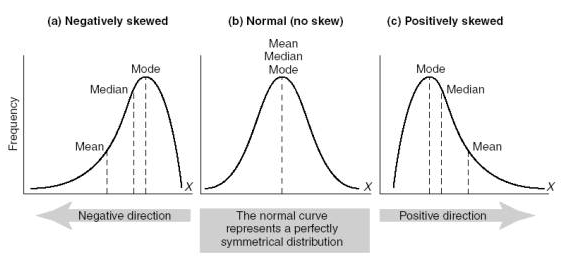

A *positive-skewed* distribution is one whose right tail is longer or fatter than its left. 

Conversely, a *negative-skewed* distribution is one whose left tail is longer or fatter than its right.


Symmetric distributions have no skewness!

#### Skewness and measures of central tendency

The mean, median, and mode are affected by skewness.

When a distribution is symmetric, the mean, median, and mode are the same.

> Symmetric: mean == median == mode

When a distribution is negatively skewed, the mean is less than the median, which is less than the mode.

> Negative skew: mean < median < mode

When a distribution is positively skewed, the mean is greater than the median, which is greater than the mode.

> Positive skew: mode < median < mean


You’ve learned numerical measures of center, spread, and outliers, but what about **measures of shape**? The histogram can give you a general idea of the shape, but two numerical measures of shape give a more precise evaluation: **skewness tells you the amount and direction of skew** (departure from horizontal symmetry), and **kurtosis tells you how tall and sharp the central peak is**, relative to a standard bell curve.

Why do we care? One application is **testing for normality**: many statistics inferences require that a distribution be normal or nearly normal. A normal distribution has skewness and excess kurtosis of 0, so if your distribution is close to those values then it is probably close to normal.

In [ ]:
# Compute the range: range_length_vers
skew_length_vers = scipy.stats.skew(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', skew_length_vers, 'cm')

Indeed, our skew is negative, indicating the data is in a slightly negative skewed distribution, where the left tail is longer. A natural question that follows is how to calculate skewness? How is the value -0.588158~ quantified?

In [ ]:
_ = sns.displot(x = versicolor_petal_length, kind = 'kde')
_ = plt.xlabel(xlabel='petal length (cm)')
_ = sns.displot(x = versicolor_petal_length, kind = 'hist')
_ = plt.xlabel(xlabel='petal length (cm)')
_ = sns.displot(x = versicolor_petal_length, kind = 'ecdf')
_ = plt.xlabel(xlabel='petal length (cm)')

<a id="52"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Box and Whiskers Plot</h2>

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine.

Furthermore, A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In a box plot, we draw a box from the first quartile to the third quartile. A vertical/horizontal line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

In [ ]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y = 'petal length (cm)', data=df_iris)

# Label the axes
_ = plt.xlabel(xlabel='species')
_ = plt.ylabel(ylabel = 'petal length (cm)')

# Save the plot
save_fig("[Versicolor] Box and Whiskers Plot on Petal Length")

# Show the plot
plt.show()


To understand the graph above, let us just look at **versicolor** for consistency. In simple terms, the ECDF of this species can be interpreted as follows: what percentage of **versicolor** have a **petal length** of less than 4 cm? By eyeballing, we can tell that about $20\%$ just by pinpointing which value on the y-axis (ECDF) corresponds to 4 cm on the x-axis (petal length).